lets start our project in a structured way :

1- Hypothesis Generation based on various factors :

* Store based features : location of the store and it's size and type affect the sales of the product
hypothesis :- sales of markets in malls are higher than sales of market in the street

* customers based features :
hypothesis:- market with high average salaries customers has high sales

* time based features : sales controlled by seasons
 hypothesis:- ice cream sales in summer are higher than in winter

* product based features : type , price ,quality , industrial comapany , offers and characteristics of the product are a features that affect the sales of the market hypothesis:- foods type has high sales products of low prices have high sales products with high quality have high sales trusted industerial company has high sales products with offers have high sales than without offers there are characteristics affect the product sales as product weight , visibilty and healthy or not (the precentage of carbohydrates and fats)

2- Loading Packages and Data :

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline 

In [ ]:
mart_data = pd.read_csv('/content/Train.csv')
mart_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


this data has informations about two categories which are (the item and the outlet) 

functions used in the project

In [ ]:
def draw_histogram(col,plottitle,xlabel,ylabel):
  plt.figure(figsize=(30,10))
  plt.hist(mart_data[col],edgecolor='black')
  plt.title(plottitle)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
# function to draw histogram to know the density of any categorical data

In [ ]:
def get_network_graph(source_column):
  g=nx.from_pandas_edgelist(mart_data,source=source_column, target="Item_Outlet_Sales", edge_attr= None )
  plt.Figure(figsize=(16,10))
  plt.plot(g,  color='red')
  plt.draw()
  # function make a network plot to show the network relations between entities of the data and the target 

In [ ]:
def draw_boxplot(col):
  sns.boxplot(mart_data[col]) 


In [ ]:
def draw_piechart(col,label):
  plt.figure(figsize=(10,10))
  plt.pie(mart_data[col].value_counts(),shadow=True ,autopct='%.3f',labels=label)
  plt.show()

In [ ]:
def draw_scatterplot(col1,col2):
  plt.scatter(mart_data[col1],mart_data[col2])


In [ ]:

def calc_linearsummary(feature):
  y = mart_data['Item_Outlet_Sales']
  x = mart_data[feature]
  x = sm.add_constant(x)
  model = sm.OLS(y, x).fit()
  print(model.summary())

In [ ]:
def handle_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower=Q1-(1.5*IQR)
  upper=Q3+(1.5*IQR)
  return lower , upper

3- Data Structure and Content :

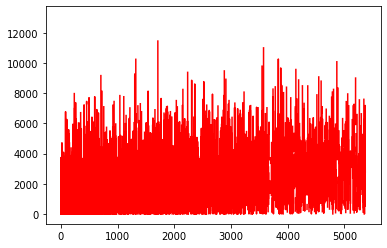

In [ ]:
get_network_graph("Item_Weight")

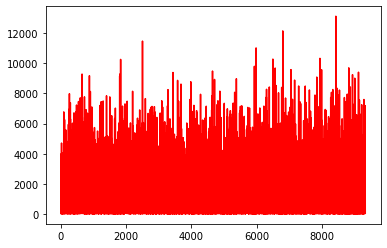

In [ ]:
get_network_graph("Item_MRP")

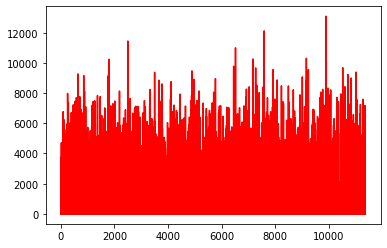

In [ ]:
get_network_graph("Item_Visibility")

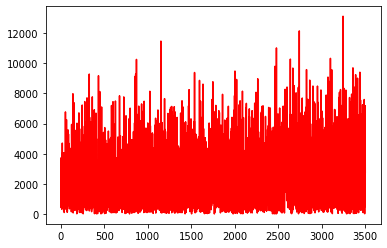

In [ ]:
get_network_graph("Outlet_Establishment_Year")

Item_MRP and Item_Visibility show a stronger relation network with the target than other entities 

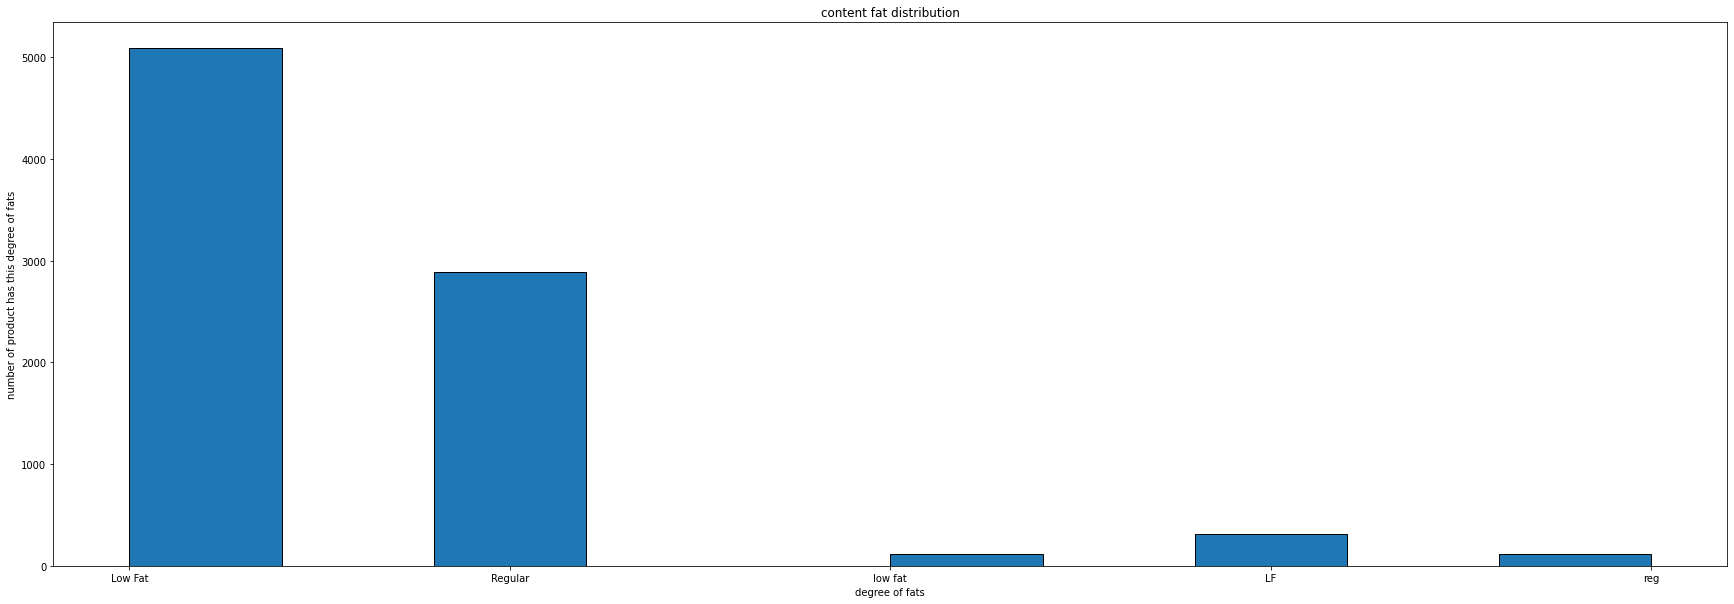

In [ ]:
draw_histogram('Item_Fat_Content','content fat distribution','degree of fats','number of product has this degree of fats')

In [ ]:
mart_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
mart_data['Item_Fat_Content']=mart_data['Item_Fat_Content'].replace('LF','Low Fat')
mart_data['Item_Fat_Content']=mart_data['Item_Fat_Content'].replace('low fat','Low Fat')
mart_data['Item_Fat_Content']=mart_data['Item_Fat_Content'].replace('reg','Regular')

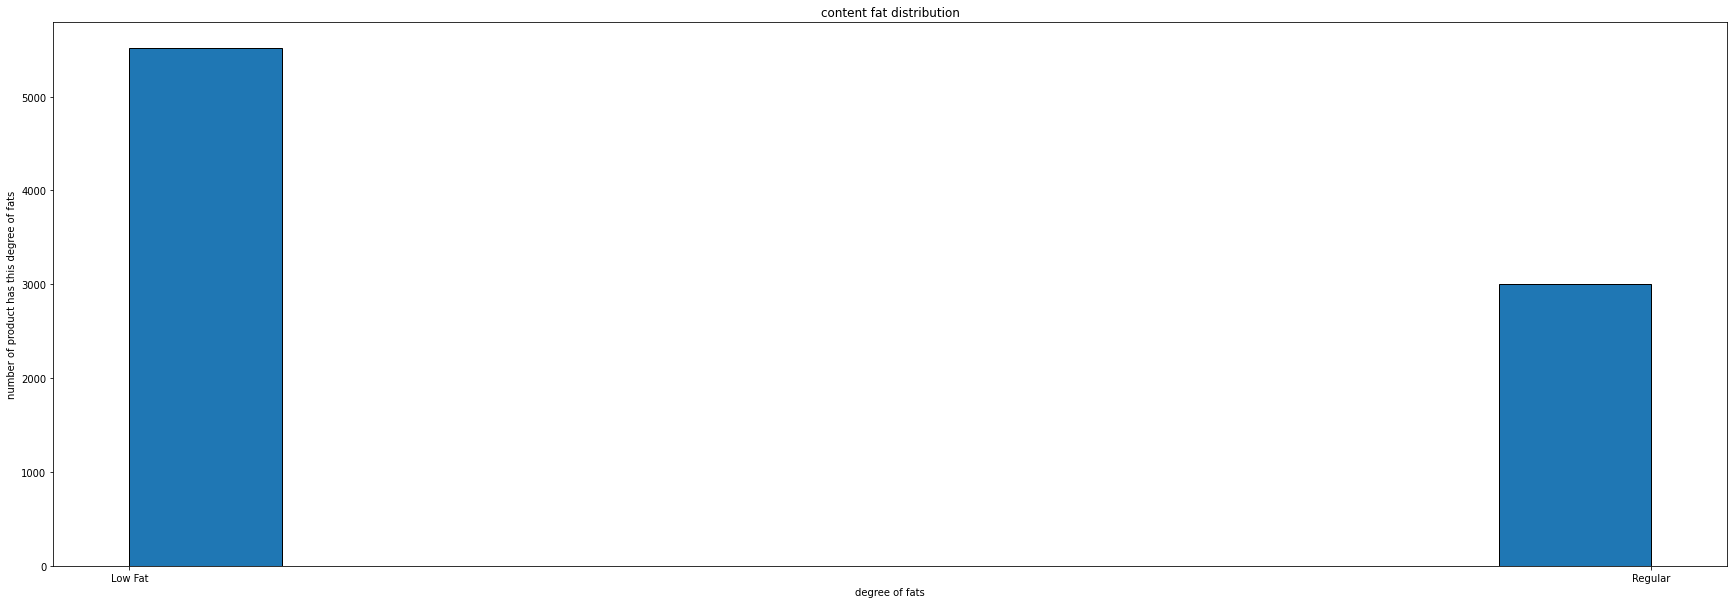

In [ ]:
draw_histogram('Item_Fat_Content','content fat distribution','degree of fats','number of product has this degree of fats')

this plot shows that the product with low fats is the begiest part of the data

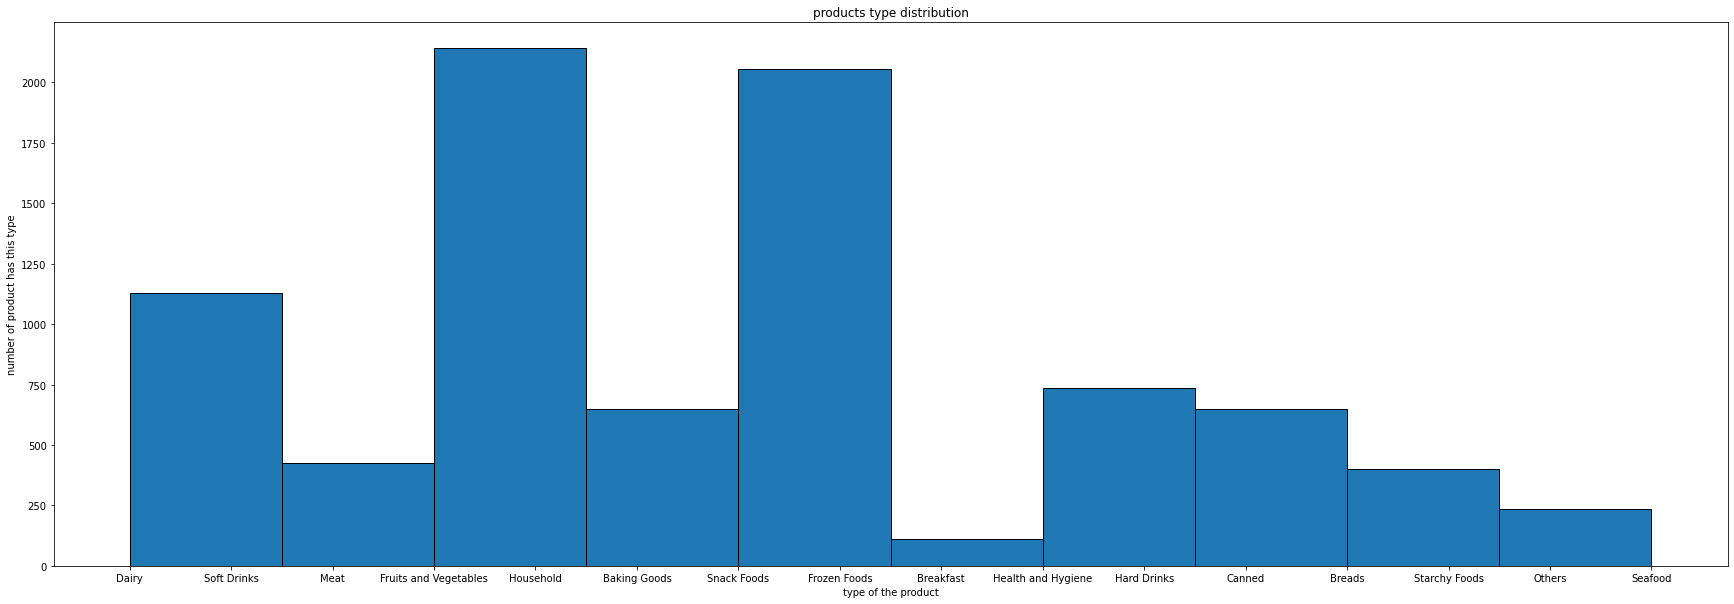

In [ ]:
draw_histogram('Item_Type','products type distribution','type of the product','number of product has this type')

this plot shows that meat has the highest product's types in the data and in the second place is baking goods and in the third place is dairy products 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


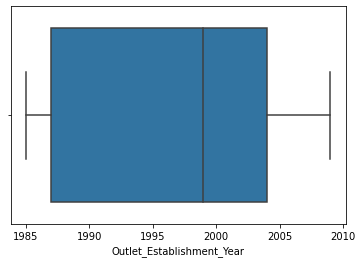

In [ ]:
draw_boxplot('Outlet_Establishment_Year')

their is no outliers in the establish year of outlets 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


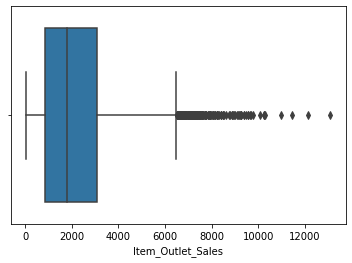

In [ ]:
draw_boxplot('Item_Outlet_Sales')

box plot shows that their is an outliers values in sales but it doessn't make noise to the data because theire is a variety in sales based on the types of the products 

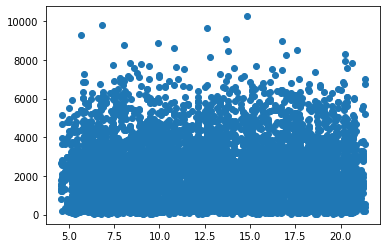

In [ ]:
draw_scatterplot('Item_Weight','Item_Outlet_Sales')

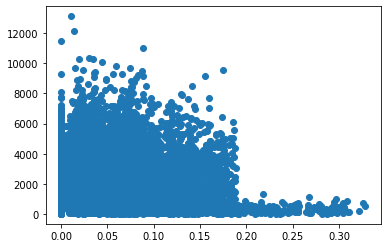

In [ ]:
draw_scatterplot('Item_Visibility','Item_Outlet_Sales')

some scatter plots to show the correlation with target 

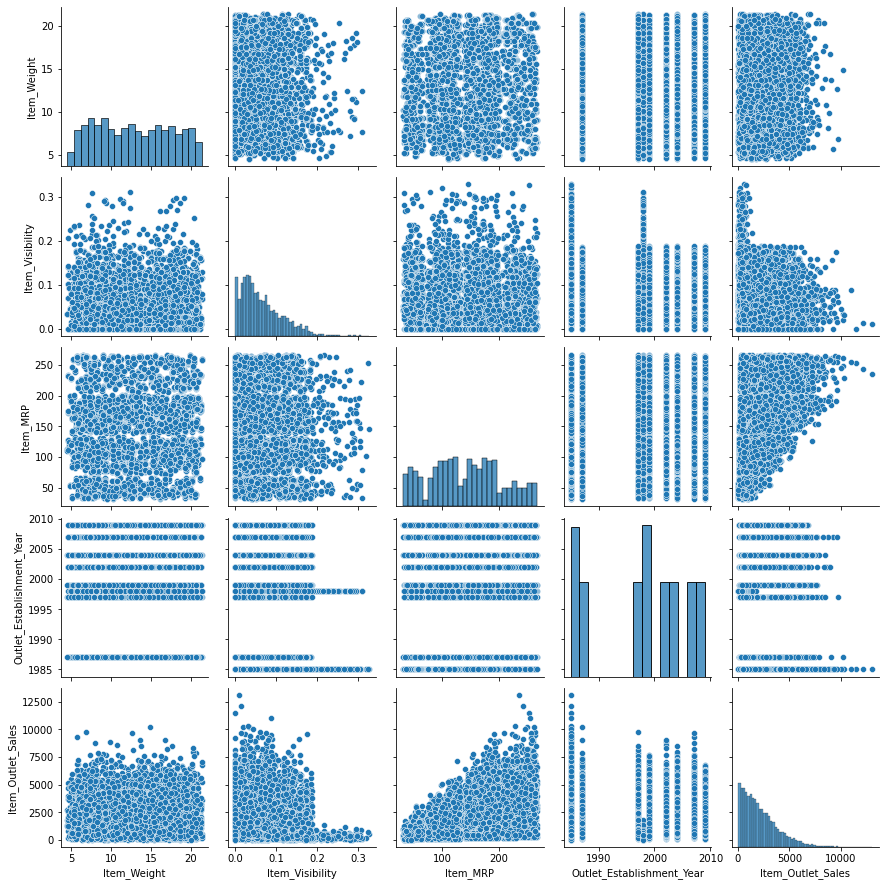

In [ ]:
sns.pairplot(mart_data)

pair plot to show the relation of all entities with each other and show the relation of all features with target

that show there is no linear relations with sales so it is expected that linear regression model won't work well

4- Exploratory Data Analysis:

In [ ]:
mart_data.shape

(8523, 12)

In [ ]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


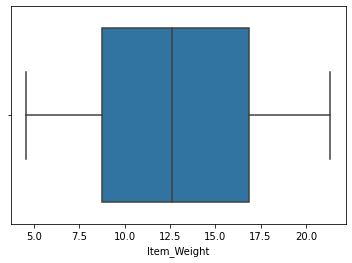

In [ ]:
draw_boxplot('Item_Weight')
#check the outlier of the weights to know how to handle null values 

In [ ]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#check nulls precentage to be more sure 
mart_data.isnull().sum()*100/mart_data.shape[0] 

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
mode_of_outlitsize=mart_data['Outlet_Size'].mode()
average_of_weights=mart_data['Item_Weight'].mean()
print(mode_of_outlitsize)

0    Medium
dtype: object


In [ ]:
mart_data['Outlet_Size']=mart_data['Outlet_Size'].fillna("Medium")
mart_data['Item_Weight']=mart_data['Item_Weight'].fillna(average_of_weights)
mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
duplicate=mart_data.duplicated()
print(duplicate.sum())

0


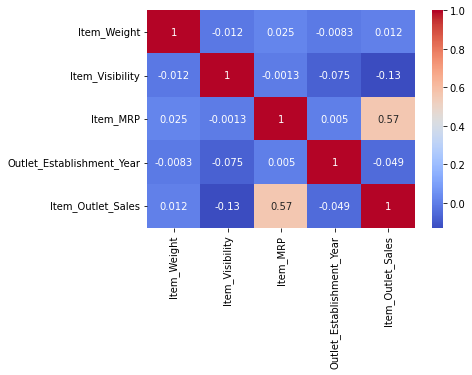

In [ ]:
sns.heatmap(mart_data.corr(),cmap='coolwarm',annot=True)
#show the correlation between data using heat map

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


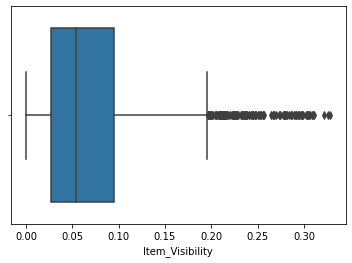

In [ ]:
draw_boxplot('Item_Visibility')

In [ ]:
minimum_visibility,maximum_visibility=handle_outlier(mart_data['Item_Visibility'])
mart_data['Item_Visibility']=np.where(mart_data['Item_Visibility']>maximum_visibility,maximum_visibility,mart_data['Item_Visibility'])
mart_data['Item_Visibility']=np.where(mart_data['Item_Visibility']<minimum_visibility,minimum_visibility,mart_data['Item_Visibility'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


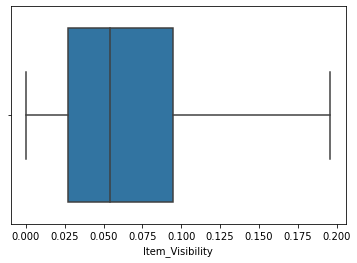

In [ ]:
draw_boxplot('Item_Visibility')
#check outliers after handling 

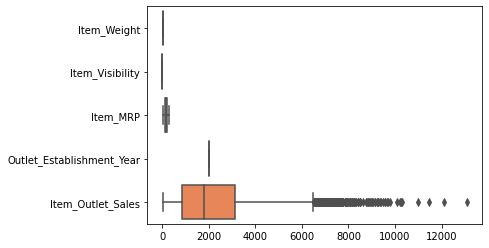

In [ ]:
sns.boxplot(data=mart_data,palette='rainbow',orient='h')
#box plot to all features to show outliers

In [ ]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
mart_data['Item_Weight']=scaling.fit_transform(mart_data[['Item_Weight']])
mart_data['Item_Visibility']=scaling.fit_transform(mart_data[['Item_Visibility']])
mart_data['Item_MRP']=scaling.fit_transform(mart_data[['Item_MRP']])
mart_data['Item_Outlet_Sales']=scaling.fit_transform(mart_data[['Item_Outlet_Sales']])

In [ ]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.841872,Low Fat,-1.008628,Dairy,1.747454,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.910601
1,DRC01,-1.641706,Regular,-0.942473,Soft Drinks,-1.489023,OUT018,2009,Medium,Tier 3,Supermarket Type2,-1.018440
2,FDN15,1.098554,Low Fat,-0.994034,Meat,0.010040,OUT049,1999,Medium,Tier 1,Supermarket Type1,-0.049238
3,FDX07,1.500838,Regular,-1.337208,Fruits and Vegetables,0.660050,OUT010,1998,Medium,Tier 3,Grocery Store,-0.849103
4,NCD19,-0.929428,Low Fat,-1.337208,Household,-1.399220,OUT013,1987,High,Tier 3,Supermarket Type1,-0.695373


5-Univariate Analysis:

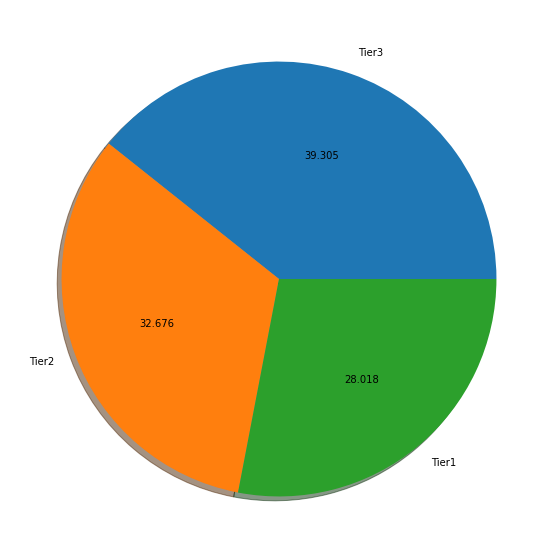

In [ ]:
label_arr=['Tier3','Tier2','Tier1']
draw_piechart('Outlet_Location_Type',label_arr)

tier 3 type has the highest number of products where 
* Tier I cities have a developed and established real estate market. These cities tend to be highly developed, with desirable schools, facilities, and businesses. These cities have the most expensive real estate.
* Tier II cities are in the process of developing their real estate markets. These cities tend to be up-and-coming, and many companies have invested in these areas, but they haven't yet reached their peak. Real estate is usually relatively inexpensive here; however, if growth continues, prices will rise.
* Tier III cities have undeveloped or nonexistent real estate markets. Real estate in these cities tends to be cheap, and there is an opportunity for growth if real estate companies decide to invest in developing the area. 

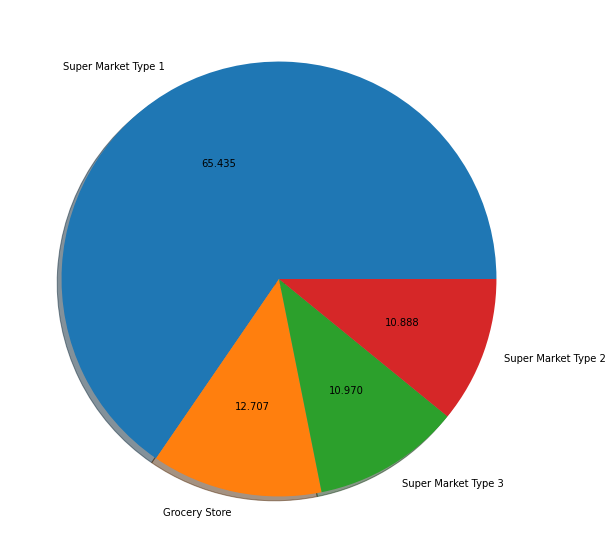

In [ ]:
labels_array=['Super Market Type 1 ','Grocery Store', 'Super Market Type 3','Super Market Type 2' ]
draw_piechart('Outlet_Type',labels_array)

supermarket type1 has the highest number of products in the data 

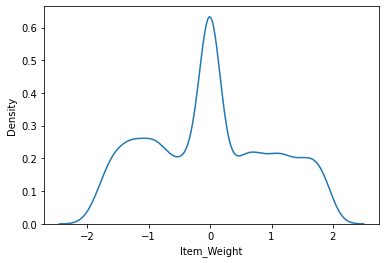

In [ ]:
sns.kdeplot(mart_data['Item_Weight'])

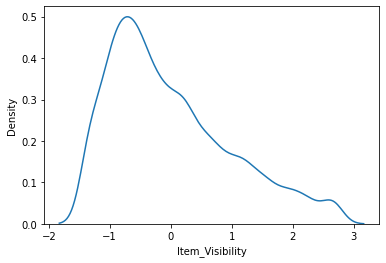

In [ ]:
sns.kdeplot(mart_data['Item_Visibility'])
# left sqiewed

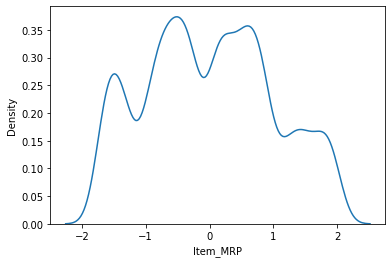

In [ ]:
sns.kdeplot(mart_data['Item_MRP'])

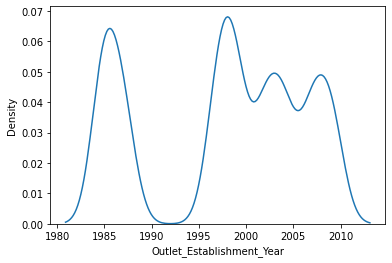

In [ ]:
sns.kdeplot(mart_data['Outlet_Establishment_Year'])

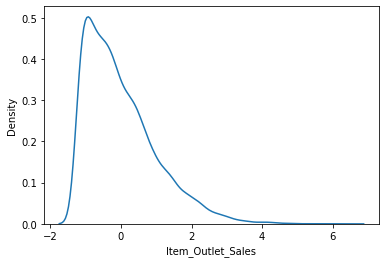

In [ ]:
sns.kdeplot(mart_data['Item_Outlet_Sales'])
#left sqeued 

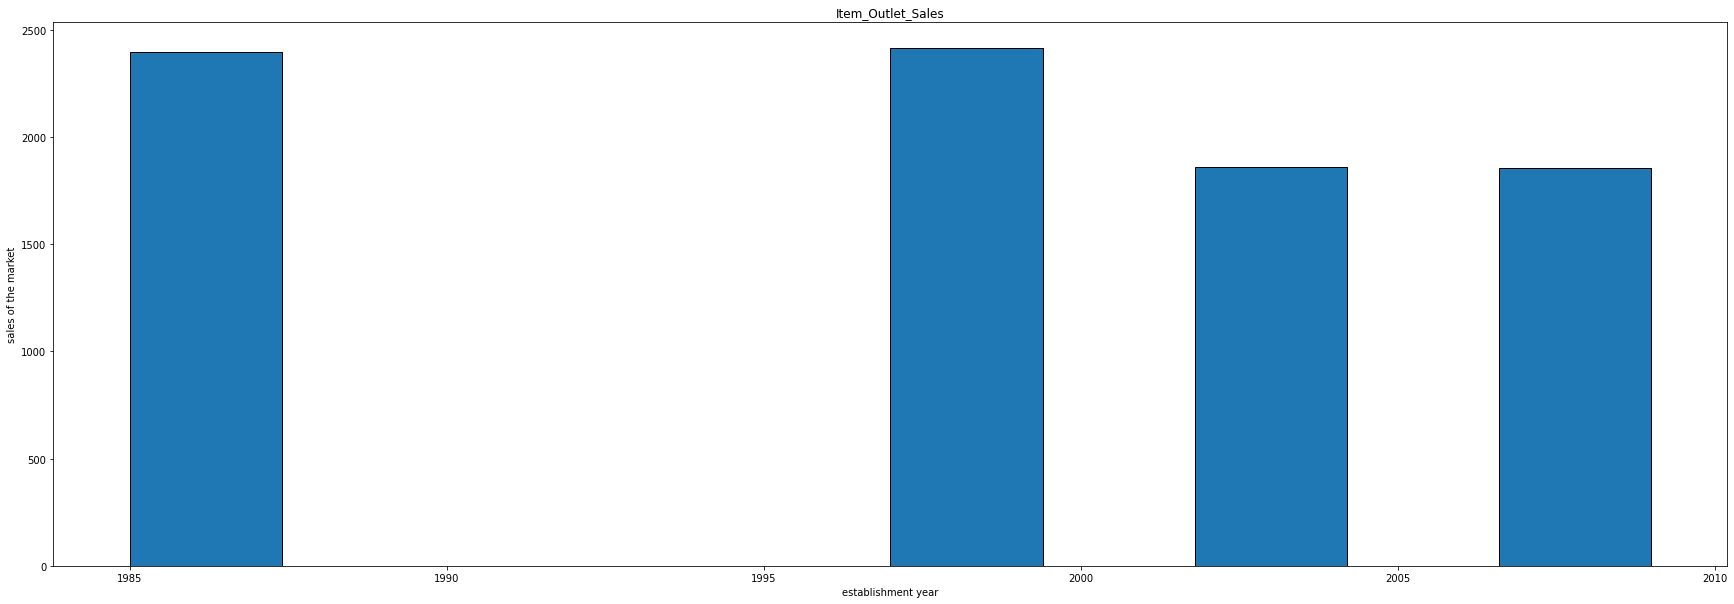

In [ ]:
draw_histogram("Outlet_Establishment_Year","Item_Outlet_Sales","establishment year","sales of the market")

old markets has very high sales 

6-Bivariate Analysis:

In [ ]:
mart_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011928,0.024756,-0.008301,0.011550
Item_Visibility,-0.011928,1.000000,-0.001163,-0.064105,-0.117918
Item_MRP,0.024756,-0.001163,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.064105,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.117918,0.567574,-0.049135,1.000000


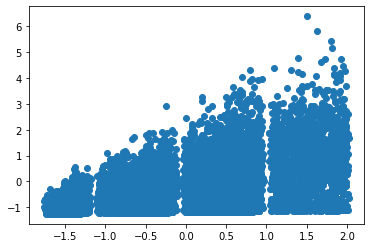

In [ ]:
draw_scatterplot('Item_MRP','Item_Outlet_Sales')

correlation coffitient and scatter plot show there is a direct relation between item_mrp and the sales 

In [ ]:
calc_linearsummary('Item_MRP')

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     4049.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:56:02   Log-Likelihood:                -10437.
No. Observations:                8523   AIC:                         2.088e+04
Df Residuals:                    8521   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.585e-16      0.009   1.78e-14      1.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


this is show the linear relation between item_mrp and sales 

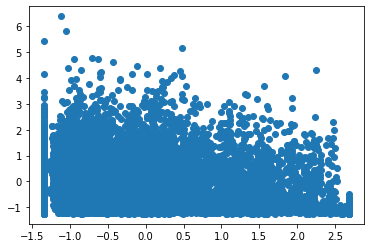

In [ ]:
draw_scatterplot('Item_Visibility','Item_Outlet_Sales')

In [ ]:
calc_linearsummary('Item_Visibility')

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     120.2
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           8.98e-28
Time:                        22:56:03   Log-Likelihood:                -12034.
No. Observations:                8523   AIC:                         2.407e+04
Df Residuals:                    8521   BIC:                         2.409e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.585e-16      0.011   1.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


that show a negative linear relation between item_visibility and sales 

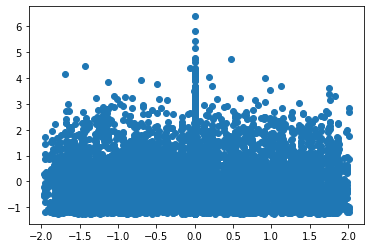

In [ ]:
draw_scatterplot('Item_Weight','Item_Outlet_Sales')

In [ ]:
calc_linearsummary('Item_Weight')

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.137
Date:                Wed, 11 Jan 2023   Prob (F-statistic):              0.286
Time:                        22:56:03   Log-Likelihood:                -12093.
No. Observations:                8523   AIC:                         2.419e+04
Df Residuals:                    8521   BIC:                         2.420e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.585e-16      0.011   1.46e-14      

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


that show no relation between weight of the product and sales but there is very slightly positive relation 

In [ ]:
calc_linearsummary('Outlet_Establishment_Year')

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     20.62
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           5.67e-06
Time:                        22:56:03   Log-Likelihood:                -12083.
No. Observations:                8523   AIC:                         2.417e+04
Df Residuals:                    8521   BIC:                         2.418e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


that show no relation between established year and sales but there is very slightly negative relation

7-Feature Engineering:

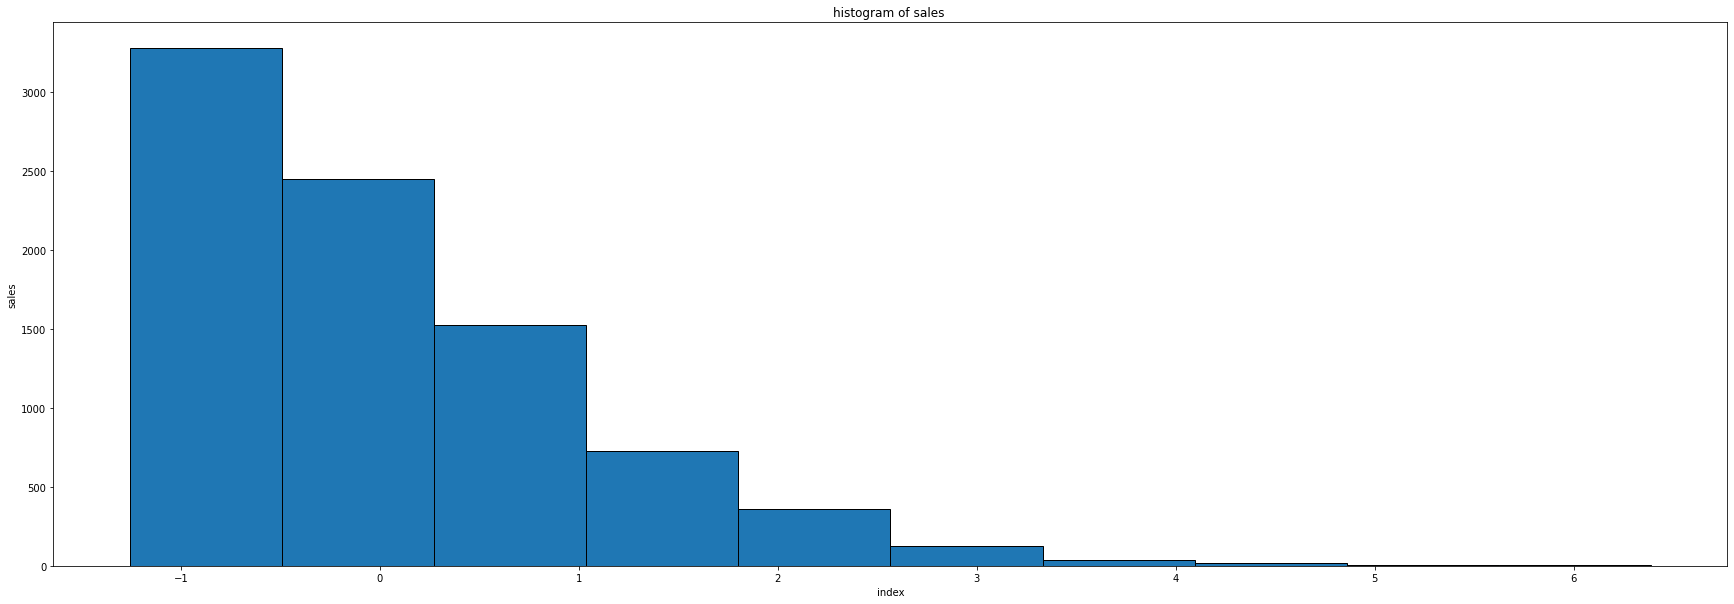

In [ ]:
draw_histogram('Item_Outlet_Sales','histogram of sales ','index','sales')

this is show that sales is right sqeued so we will make sqrt transformation to be normaly destributed

(array([189., 538., 793., 753., 598., 400., 181.,  51.,  17.,   3.]),
 array([0.01775106, 0.26878111, 0.51981117, 0.77084122, 1.02187128,
        1.27290133, 1.52393139, 1.77496144, 2.0259915 , 2.27702155,
        2.52805161]),
 <a list of 10 Patch objects>)

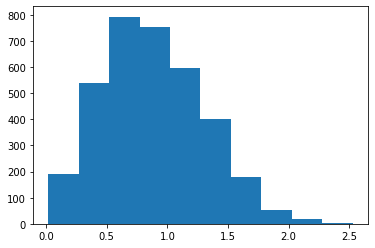

In [ ]:
plt.hist(mart_data.Item_Outlet_Sales**(1/2))

the sales are transformed and be normal distribution

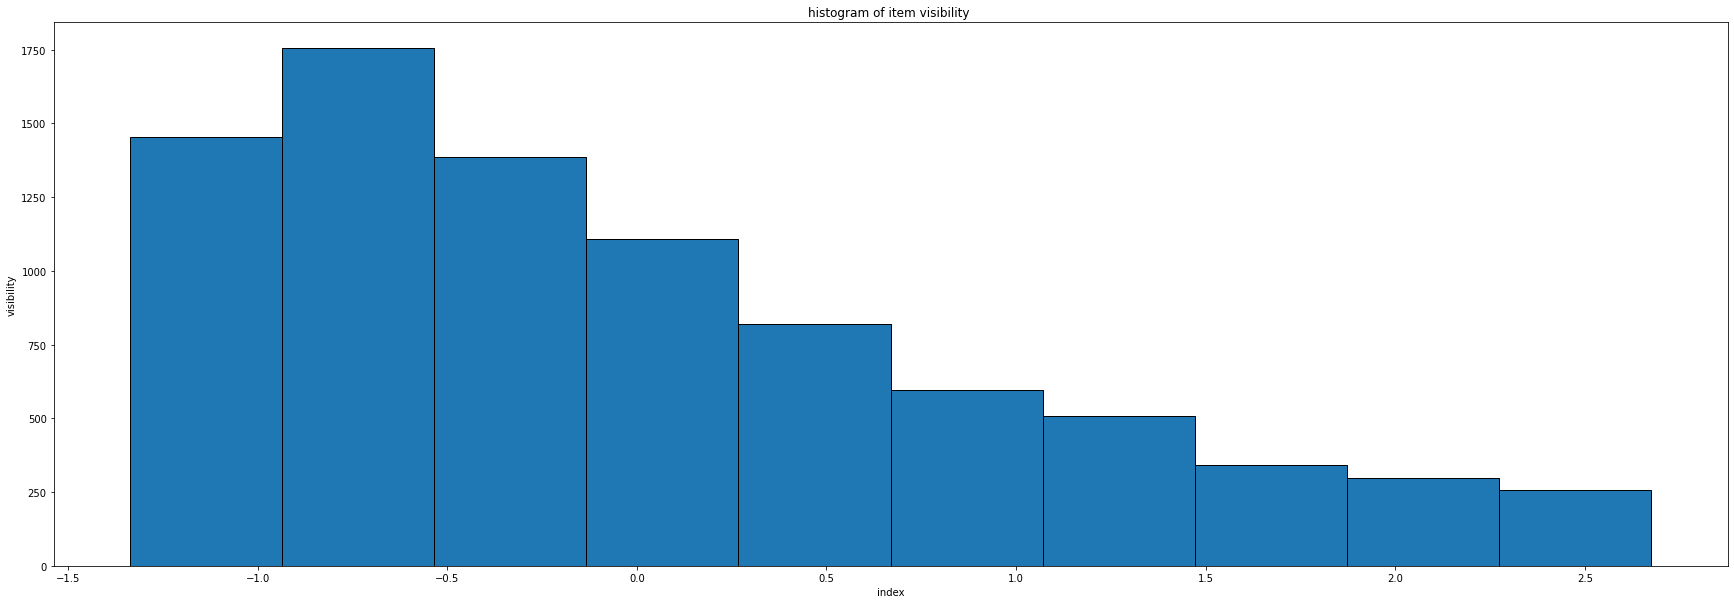

In [ ]:
draw_histogram('Item_Visibility','histogram of item visibility ','index','visibility')

shows left sqeued distribution

(array([ 96., 194., 418., 405., 467., 452., 500., 380., 322., 341.]),
 array([0.01111175, 0.17357334, 0.33603493, 0.49849652, 0.66095811,
        0.8234197 , 0.98588128, 1.14834287, 1.31080446, 1.47326605,
        1.63572764]),
 <a list of 10 Patch objects>)

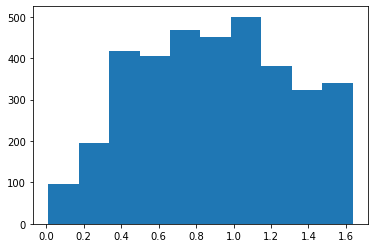

In [ ]:
plt.hist(mart_data.Item_Visibility**(1/2))

transformed to be normaly distributed

In [ ]:
mart_data.drop(labels = ['Item_Identifier','Outlet_Identifier'], axis=1, inplace = True)

In [ ]:
mart_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.841872,Low Fat,-1.008628,Dairy,1.747454,1999,Medium,Tier 1,Supermarket Type1,0.910601
1,-1.641706,Regular,-0.942473,Soft Drinks,-1.489023,2009,Medium,Tier 3,Supermarket Type2,-1.018440
2,1.098554,Low Fat,-0.994034,Meat,0.010040,1999,Medium,Tier 1,Supermarket Type1,-0.049238
3,1.500838,Regular,-1.337208,Fruits and Vegetables,0.660050,1998,Medium,Tier 3,Grocery Store,-0.849103
4,-0.929428,Low Fat,-1.337208,Household,-1.399220,1987,High,Tier 3,Supermarket Type1,-0.695373


drop unuseful features that won't be used in prediction algorithm

8-Categorical Data Encoding:

In [ ]:
mart_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
mart_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
mart_data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [ ]:
mart_data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
mart_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
mart_data["Item_Fat_Content"] = np.where(mart_data["Item_Fat_Content"].str.contains("Regular"), 1, 0)
cleaning_dict = {"Outlet_Size":    { 'Medium': 1, 'High': 2 , 'Small':0},
                "Outlet_Type": {'Supermarket Type1': 1, 'Supermarket Type2': 2,'Grocery Store': 4, 'Supermarket Type3': 3},
                 'Outlet_Location_Type':{'Tier 1':1 , 'Tier 2':2, 'Tier 3':3}
               }
mart_data = mart_data.replace(cleaning_dict)


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
mart_data['Item_Type']= label_encoder.fit_transform(mart_data['Item_Type'])
mart_data['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [ ]:
mart_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.841872,0,-1.008628,4,1.747454,1999,1,1,1,0.910601
1,-1.641706,1,-0.942473,14,-1.489023,2009,1,3,2,-1.018440
2,1.098554,0,-0.994034,10,0.010040,1999,1,1,1,-0.049238
3,1.500838,1,-1.337208,6,0.660050,1998,1,3,4,-0.849103
4,-0.929428,0,-1.337208,9,-1.399220,1987,2,3,1,-0.695373


9-Prepare Test Data:

In [ ]:
test=pd.read_csv("/content/Test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test.drop(labels = ['Item_Identifier','Outlet_Identifier'], axis=1, inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
test['Item_Weight']=scaling.fit_transform(test[['Item_Weight']])
test['Item_Visibility']=scaling.fit_transform(test[['Item_Visibility']])
test['Item_MRP']=scaling.fit_transform(test[['Item_MRP']])


In [ ]:
print(test.isnull().sum())
print(test['Outlet_Size'].mode())

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64
0    Medium
dtype: object


In [ ]:
test['Outlet_Size']=test['Outlet_Size'].fillna('Medium')
test['Item_Weight']=test['Item_Weight'].fillna((test['Item_Weight'].mean()))
test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
test["Item_Fat_Content"] = np.where(test["Item_Fat_Content"].str.contains("Regular"), 1, 0)
cleaning_dict = {"Outlet_Size":    { 'Medium': 1, 'High': 2 , 'Small':0},
                "Outlet_Type": {'Supermarket Type1': 1, 'Supermarket Type2': 2,'Grocery Store': 4, 'Supermarket Type3': 3},
                 'Outlet_Location_Type':{'Tier 1':1 , 'Tier 2':2, 'Tier 3':3}
               }
test = test.replace(cleaning_dict)


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test['Item_Type']= label_encoder.fit_transform(test['Item_Type'])


In [ ]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.726792e+00,0,-1.134077,13,-0.536555,1999,1,1,1
1,-9.423887e-01,0,-0.531850,4,-0.868937,2007,1,2,1
2,4.082810e-01,0,0.661316,11,1.629848,1998,1,3,4
3,-1.153565e+00,0,-0.981416,13,0.226697,2007,1,2,1
4,-1.736714e-17,1,1.032540,4,1.508110,1985,1,3,3


10-Modeling:

* split the data 

In [ ]:
x=mart_data.drop(['Item_Outlet_Sales'],axis=1)
y=mart_data['Item_Outlet_Sales']
#split data to features and target

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=44,test_size=0.1)
#split data to train and test

* linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

In [ ]:
model.score(x_test,y_test)
#show the score 

0.4625985057303854

In [ ]:
model.coef_
#show the hyber parameters of linear equation

array([-6.96132227e-03,  3.04882758e-02, -5.95900654e-02, -5.11632452e-04,
        5.64105678e-01, -2.83558066e-02, -2.95036171e-01,  3.62863414e-01,
       -3.68589060e-01])

In [ ]:
accuracy=model.score(x_test,y_test)
print(accuracy*100)
#print the accuracy of the model

46.25985057303854


linear regression shows bad accuracy and that was proved from the pair plot which shows that no linear relations between features and target

* RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 1, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(x, y) 
y_ = regressor.predict(x_test)


In [ ]:
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(y_test, y_)) 

print("RMSE: %f" % (rmse))

RMSE: 0.540815


random forest show a low root mean square error which endicate that the model work very well 

XGBoost model

In [ ]:
import xgboost as xgb

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.5,max_depth = 3, alpha = 1, n_estimators = 90) 
xg_reg.fit(x_train,y_train) 
pred = xg_reg.predict(x_test) 


[22:56:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(y_test, pred)) 
print("RMSE: %f" % (rmse))

RMSE: 0.632070


XGBoost show a low root mean square error which endicate that the model work very well 

In [ ]:
y_linear_p= model.predict(test)
y_rf_p= regressor.predict(test)
y_xg_p= xg_reg.predict(test) 

In [ ]:
lin=pd.DataFrame(y_linear_p)
test_data_with_linearprediction = pd.concat([test, lin], axis=1)
rf=pd.DataFrame(y_rf_p)
test_data_with_rforestprediction = pd.concat([test, rf], axis=1)
xgboost=pd.DataFrame(y_xg_p)
test_data_with_xgprediction = pd.concat([test, xgboost], axis=1)

those three data frames contain the test data with prediction of sales with different algorithms 

conclusion :
sales depends on more than one feature and the features are classify into two types which is item data and stock data and this features affect the target with vary precentage based on correlation and other factors , the data is not linearly related with each other and that make a linear regression model be a very poor predictor , hyper parameter tuning helps a lot in building good model specialy XGBoost Model 

Note : the ideal accuracy of this project is around (60%)